# KNN(k-neighbors nearest)

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
df=pd.read_csv(r'C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Obesity Classification.csv',index_col=0)
df

,Age,Gender,Height,Weight,BMI,Label
ID,,,,,,
1,25,Male,175,80,25.3,Normal Weight
2,30,Female,160,60,22.5,Normal Weight
3,35,Male,180,90,27.3,Overweight
4,40,Female,150,50,20.0,Underweight
5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
106,11,Male,175,10,3.9,Underweight
107,16,Female,160,10,3.9,Underweight
108,21,Male,180,15,5.6,Underweight


In [25]:
df.duplicated().sum()

np.int64(0)

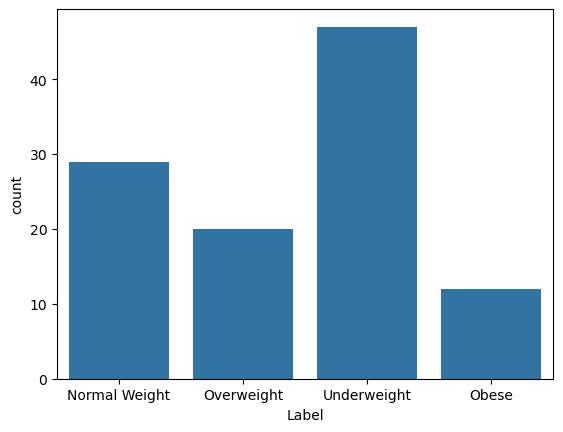

In [26]:
sns.countplot(x=df['Label'])
plt.show()

In [27]:
df=pd.get_dummies(data=df,columns=['Gender'],dtype=int)
df # one hot encoding

,Age,Height,Weight,BMI,Label,Gender_Female,Gender_Male
ID,,,,,,,
1,25,175,80,25.3,Normal Weight,0,1
2,30,160,60,22.5,Normal Weight,1,0
3,35,180,90,27.3,Overweight,0,1
4,40,150,50,20.0,Underweight,1,0
5,45,190,100,31.2,Obese,0,1
...,...,...,...,...,...,...,...
106,11,175,10,3.9,Underweight,0,1
107,16,160,10,3.9,Underweight,1,0
108,21,180,15,5.6,Underweight,0,1


In [28]:
le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])
df # label encoding  bcaz (y) target column dependent column

,Age,Height,Weight,BMI,Label,Gender_Female,Gender_Male
ID,,,,,,,
1,25,175,80,25.3,0,0,1
2,30,160,60,22.5,0,1,0
3,35,180,90,27.3,2,0,1
4,40,150,50,20.0,3,1,0
5,45,190,100,31.2,1,0,1
...,...,...,...,...,...,...,...
106,11,175,10,3.9,3,0,1
107,16,160,10,3.9,3,1,0
108,21,180,15,5.6,3,0,1


# scaling 

In [29]:
x=df.drop(columns=['Label'])
y=df['Label']

In [30]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.87603177,  0.30369968,  0.71405281,  0.62937623, -0.96362411,
         0.96362411],
       [-0.67282853, -0.2369525 ,  0.01773043,  0.25844781,  1.03774904,
        -1.03774904],
       [-0.46962528,  0.48391707,  1.06221401,  0.8943251 , -0.96362411,
         0.96362411],
       [-0.26642203, -0.59738728, -0.33043076, -0.07273828,  1.03774904,
        -1.03774904],
       [-0.06321879,  0.84435186,  1.4103752 ,  1.4109754 , -0.96362411,
         0.96362411],
       [ 0.13998446, -0.95782207, -0.67859195, -0.50990391,  1.03774904,
        -1.03774904],
       [ 0.3431877 ,  1.20478665,  1.75853639,  1.8083987 , -0.96362411,
         0.96362411],
       [ 0.54639095, -1.31825686, -1.02675314, -0.96031699,  1.03774904,
        -1.03774904],
       [ 0.7495942 ,  1.56522143,  2.10669758,  2.20582201, -0.96362411,
         0.96362411],
       [ 0.95279744, -1.67869164, -1.37491433, -1.39748263,  1.03774904,
        -1.03774904],
       [-1.16051632,  0.30369968,  0.36589162,  0.

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:
yp=knn.predict(xtest)
yp

array([1, 3, 0, 2, 3, 0, 0, 2, 0, 3, 2, 2, 2, 3, 3, 1, 0, 3, 2, 2, 1, 3])

In [34]:
# overfitting ---> train -->high  diff 3% betn train & test
                #test--> low
# underfitting---->train-->
                #test----> low

In [35]:
confusion_matrix(ytest,yp)

array([[5, 0, 0, 1],
       [0, 3, 1, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 6]])

In [36]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.75      0.86         4
           2       0.86      1.00      0.92         6
           3       0.86      1.00      0.92         6

    accuracy                           0.91        22
   macro avg       0.93      0.90      0.90        22
weighted avg       0.92      0.91      0.91        22



In [37]:
knn.score(xtrain,ytrain)

0.9418604651162791

In [38]:
knn.score(xtest,ytest)

0.9090909090909091

In [39]:
print(f'traning accuracy:{knn.score(xtrain,ytrain)}')
print(f'traning accuracy:{knn.score(xtest,ytest)}')

traning accuracy:0.9418604651162791
traning accuracy:0.9090909090909091



#
* when the accuracy diffn betn traing data and test data  is greater than 3% ,we consider it as a overfitted model above 
*  model is overfited as we have not selected the ideal k value . we have to perform hyperparameter tuning to reduce the accuracy
* diffn betn traing data and test data  & get genralize or robust

# Hyperparameter tuning

In [40]:
train_accuracy=[]
test_accuracy=[]

for i in range(1,21):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(xtrain,ytrain)
    train_accuracy.append(Knn.score(xtrain,ytrain))
    test_accuracy.append(Knn.score(xtest,ytest))

In [41]:
train_accuracy

[1.0,
 0.9186046511627907,
 0.9418604651162791,
 0.8953488372093024,
 0.8837209302325582,
 0.8837209302325582,
 0.8837209302325582,
 0.8604651162790697,
 0.8837209302325582,
 0.8255813953488372,
 0.8372093023255814,
 0.8255813953488372,
 0.8023255813953488,
 0.7441860465116279,
 0.7325581395348837,
 0.7674418604651163,
 0.7790697674418605,
 0.7441860465116279,
 0.7209302325581395,
 0.686046511627907]

In [42]:
test_accuracy

[0.8636363636363636,
 0.8181818181818182,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.8636363636363636,
 0.9090909090909091,
 0.7727272727272727,
 0.9090909090909091,
 0.8181818181818182,
 0.8636363636363636,
 0.7727272727272727,
 0.7272727272727273,
 0.7272727272727273,
 0.6818181818181818,
 0.7272727272727273,
 0.6818181818181818,
 0.6363636363636364,
 0.5909090909090909,
 0.5909090909090909]

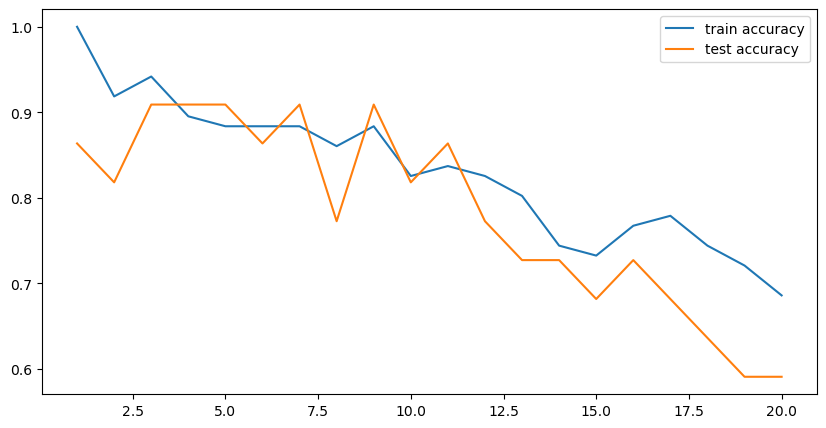

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(1,21),train_accuracy,label='train accuracy') 
plt.plot(range(1,21),test_accuracy,label='test accuracy')
plt.legend()
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))


0.8953488372093024
0.9090909090909091
